In [7]:
# 1. cctv_seoul.csv 파일 내용을 읽어서 인구수 대비 CCTV수와 인구수 대비 고령자 비율을 계산하여 각각 CCTV비율과 노인비율이라는 열을 추가하고 앞에서 부터 5개 행을 출력한다. 
# CCTV비율과 노인비율 추가시 apply() 함수를 사용해서 추가한다.
import pandas as pd

df = pd.read_csv("data/cctv_seoul.csv")

def rating(a, b):
    return (a / b)*100

df["CCTV비율"] = df.apply(lambda x: rating(x["CCTV수"], x["인구수"]), axis = 1)
df["노인비율"] = df.apply(lambda x: rating(x["고령자"], x["인구수"]), axis = 1)


display(df.head())

,구별,CCTV수,인구수,한국인,외국인,고령자,CCTV비율,노인비율
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.487292,11.072217
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.170552,12.051638
2,강북구,748,330192.0,326686.0,3506.0,54813.0,0.226535,16.600342
3,강서구,884,603772.0,597248.0,6524.0,72548.0,0.146413,12.015794
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,0.284673,12.955291


In [2]:
from matplotlib import font_manager, rc
font_path = "data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

THEGaeideuk


In [3]:
# 2-1. 상품별 클릭수를 바그래프로 그리는데 클릭수가 많은 순으로 그린다
df = pd.read_csv("data/product_click.log", header = None, sep = " ")
df.columns = ["클릭일자", "상품ID"]

# 데이터프레임에서 plot표현할 시 색 적용 실패, Series로 지정해야 함
# count: 데이터프레임, size: 시리즈 로 추출



display(df)

,클릭일자,상품ID
0,201612120944,p001
1,201612120944,p003
2,201612120944,p003
3,201612120945,p008
4,201612121052,p008
...,...,...
741,201708121052,p004
742,201708121052,p004
743,201708121052,p009
744,201708121115,p005


In [ ]:
# 2-2. 어떤 요일에 가장 많이 클릭하는지 다음과 같이 출력하시오.


day = {
    0: "월요일",
    1: "화요일",
    2: "수요일",
    3: "목요일",
    4: "금요일",
}

In [ ]:
# 2-3. 어느 시간대에 가장 많이 클릭하는지 다음과 같이 출력하시오.

In [4]:
# 3-1. 공된 emp.csv 를 읽고 데이터프레임으로 생성하여 다음 질문들을 해결해 본다.
# 부서별 월급의 합
df = pd.read_csv("data/emp.csv")
df1 = df.groupby(["deptno"])
display(df1.head())

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,1981-02-03,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,1981-03-02,2975,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,1981-10-22,1250,1400.0,30
5,7698,BLAKE,MANAGER,7839.0,1981-05-01,2850,NaN,30
6,7782,CLARK,MANAGER,7839.0,1981-09-06,2450,NaN,10
7,7788,SCOTT,ANALYST,7566.0,1982-12-08,3000,NaN,20
8,7839,KING,PRESIDENT,NaN,1981-11-17,5000,NaN,10
9,7844,TURNER,SALESMAN,7698.0,1984-10-08,1500,NaN,30


In [ ]:
# 3-2. 직무(job)별 월급의 합

In [5]:
# 3-3. 부서와 직무(job)별 최고 월급과 입사한지 가장 오래된 직원의 입사날짜

df3 = df.groupby(["deptno", "job"])
df33 = df3.agg({"sal" : "max", "hiredate" : "first"})
display(df33)

sal    hiredate
deptno job                        
10     CLERK      1300  1982-01-25
       MANAGER    2450  1981-09-06
       PRESIDENT  5000  1981-11-17
20     ANALYST    3000  1982-12-08
       CLERK      1100  1980-12-17
       MANAGER    2975  1981-03-02
30     CLERK       950  1981-12-03
       MANAGER    2850  1981-05-01
       SALESMAN   1600  1981-02-20

In [7]:
# 3-4. 직무(job)와 부서별 최고 월급

df4 = df.groupby(["job", "deptno"])
df44 = df4.agg({"sal" : "max"})
display(df44)

sal
job       deptno      
ANALYST   20      3000
CLERK     10      1300
          20      1100
          30       950
MANAGER   10      2450
          20      2975
          30      2850
PRESIDENT 10      5000
SALESMAN  30      1600

In [8]:
# 3-5. 부서번호를 인덱스, 직무를 컬럼으로 구성하고 월급의 합으로 구성되는 피벗테이블을 만들고 pv1변수에 저장한다.

pv1 = pd.pivot_table(df,
                    index = "deptno",
                    columns = "job",
                    values = "sal",
                    aggfunc = "sum")

# pv1 = pd.pivot_table(df, index = "deptno", columns = "job",  aggfunc = "sum")
# aggfunc생략할 시 기본적으로 평균 추출
display(pv1)

job,ANALYST,CLERK,MANAGER,PRESIDENT,SALESMAN
deptno,,,,,
10,NaN,1300.0,2450.0,5000.0,NaN
20,6000.0,1900.0,2975.0,NaN,NaN
30,NaN,950.0,2850.0,NaN,5600.0


In [9]:
# 3-6. pv1 에서 NaN 값을 0으로 설정한다.

pv1.fillna(0, inplace = True)


<AxesSubplot:xlabel='job', ylabel='deptno'>

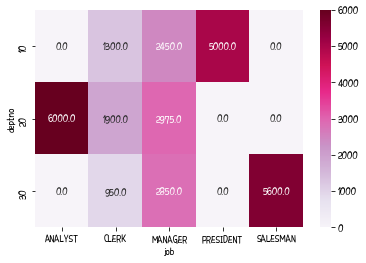

In [10]:
# 3-7. pv1을 가지고 다음과 같은 히트맵을 그린다.
import seaborn as sns

sns.heatmap(pv1, annot = True, cmap = "PuRd", fmt = ".1f")
# .1f: 소수점이하 첫째자리, d = 정수부분

In [ ]:
# 3-8. emp 데이터 프레임에서 hiredate 열을 가지고 datetime64 타입의 hiredatenew 열을 만들고 year와 month 열을 추가한 후에 정보를 출력하고 상위 5개 행을 출력한다.



In [14]:
# 3-9. 입사 년과 월을  인덱스, 직무를 컬럼으로 구성하고 월급의 최대값으로 구성되는 피벗테이블을 만들고 pv2변수에 저장한다. NaN은 0으로 채운다.

pv2 = pd.pivot_table(df, 
                    index = ["year", "month"],
                    columns = "deptno",
                    values = "sal",
                    aggfunc = "max")

pv2.fillna(0, inplace = True)
display(pv2)

TypeError: pivot_table() got an unexpected keyword argument 'indexs'

In [ ]:
# 3-10. pv2 에서 인덱싱을 통해 다음 데이터들을 추출한다.
# 1981년 12월 데이터들을 추출한다.

print(pv2.xs(1981, 12))

# 1982년 데이터들을 추출한다.

print(pv2.xs(1982))

# 매년 12월 데이터들을 추출한다.

print(pv2.xs(12, level = "month"))

In [ ]:
# 3-11. pv2를 가지고 다음과 같은 히트맵을 그린다.

sns.heatmap(pv2, cmap = "Pastel1")